<font size="16"> Demo CosmoGridV1 for Euclid RR2 </font>

# Initialize

In [14]:
import h5py
import numpy as np
import healpy as hp

# Load data

In [17]:
fname = '/global/cfs/cdirs/m5099/tomaszk7/251021_cosmogridv1_euclid/001_rr2_pipeline/v11euclidRR2/CosmoGrid/proj_v11euclidRR2/grid/cosmo_000001/run_0000/projected_probes_maps_v11dmb.h5'
with h5py.File(fname, 'r') as f:
    print(list(f.keys()))
with h5py.File(fname, 'r') as f:
    print(f['maps_WL'].keys())
with h5py.File(fname, 'r') as f:
    print(f['maps_WL/1'].keys())



['Cls_sim', 'Cls_theory', 'cosmo_astropy', 'cosmo_camb', 'cosmo_pyccl', 'hp_indices', 'kappa_tomo', 'maps_WL', 'ngal_glass', 'nuissance_parameters']
<KeysViewHDF5 ['0', '1', '2', '3', '4', '5', '6']>
<KeysViewHDF5 ['e1', 'e1n', 'e1r_map0_ref', 'e2', 'e2n', 'e2r_map0_ref', 'g1_map', 'g2_map', 'var_']>


# Load maps

Tomography:

`list_maps[0]` is the non-tomographic map     
`list_maps[1:]` are the tomographic maps

Only non-zero elements of the maps are stored. The indices are stored in `hp_indices`. The `nside` is 1024.

In [28]:
nside = 1024
with h5py.File(fname, 'r') as f:
    hp_indices = np.array(f['hp_indices'])
print('number of non-zero elements in the maps: {}/{}'.format(len(hp_indices), hp.nside2npix(nside)))

number of non-zero elements in the maps: 119878/12582912


In [41]:
def dense_from_sparse(sparse_map, hp_indices, nside):
    m = np.full(hp.nside2npix(nside), hp.UNSEEN)
    m[hp_indices] = sparse_map
    
    return m

In [73]:

def load_maps(key_e1, key_e2):
    list_maps = []
    with h5py.File(fname, 'r') as f:
        for key in f['maps_WL'].keys():
            e1n_nonzeros = np.array(f['maps_WL'][key][key_e1])
            e2n_nonzeros = np.array(f['maps_WL'][key][key_e2])
            e1n = dense_from_sparse(e1n_nonzeros, hp_indices, nside)
            e2n = dense_from_sparse(e2n_nonzeros, hp_indices, nside)
            list_maps.append((e1n, e2n))

    return list_maps

In [ ]:
def plot_maps(list_maps, tag='', lims=(-0.01, 0.01)):

    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(2, 6, figsize=(18, 6))
    for i, (e1n, e2n) in enumerate(list_maps):
        if i >= 6:  # in case there are more than 6 maps
            break

        # plot e1n
        hp.orthview(e1n, fig=fig.number, sub=(2, 6, 1 + i), title=f'{tag} e1n map zbin {i}', min=lims[0], max=lims[1], cmap='RdBu_r', rot=[30,-50,90], half_sky=True, cbar=False)
        ax = fig.axes[i]
        ax.set_axis_off()

        # plot e2n
        hp.orthview(e2n, fig=fig.number, sub=(2, 6, 7 + i), title=f'{tag} e2n map zbin {i}', min=lims[0], max=lims[1], cmap='RdBu_r', rot=[30,-50,90], half_sky=True, cbar=False)
        ax = fig.axes[6+i]
        ax.set_axis_off()

    plt.show()



# Plot noise-free maps

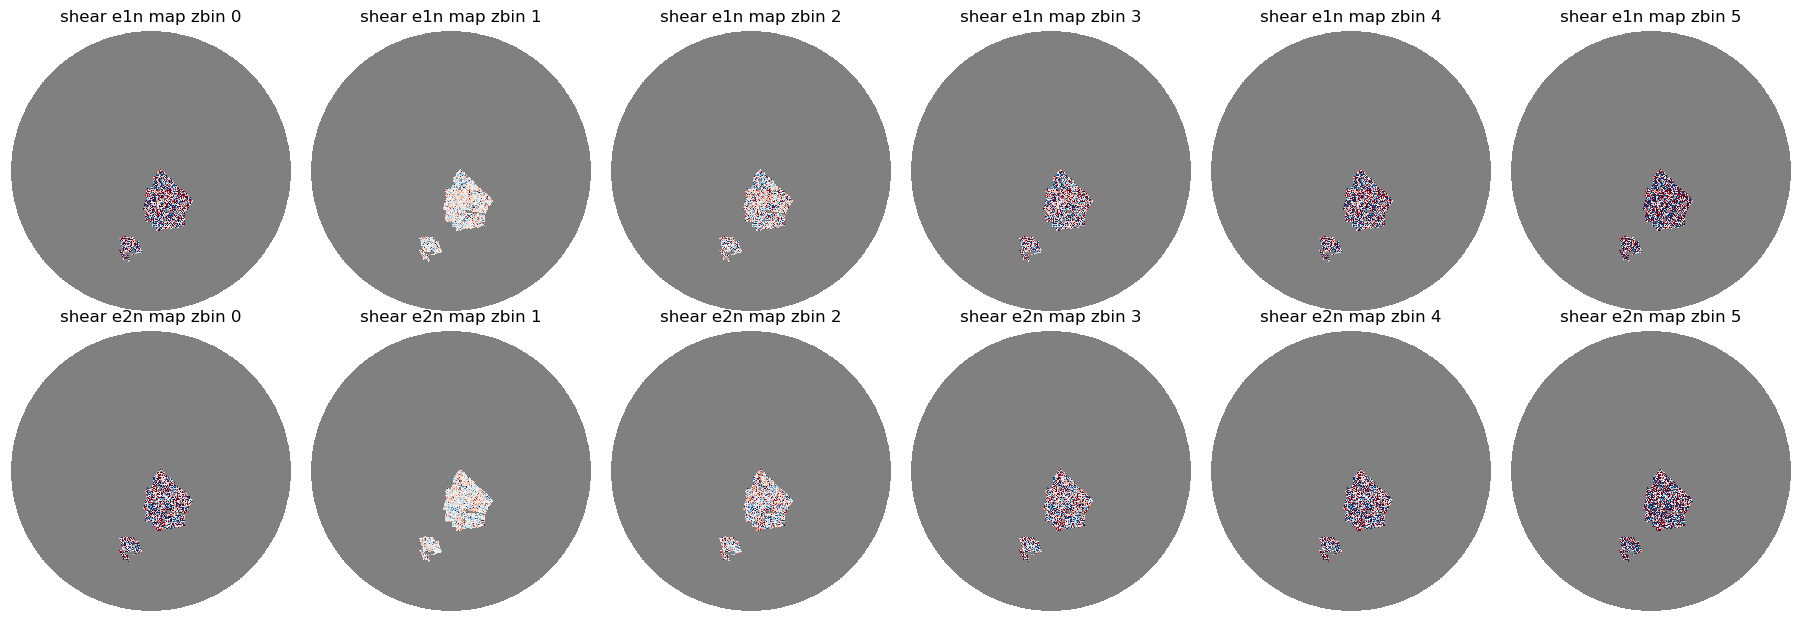

In [100]:
list_maps_shear = load_maps('g1_map', 'g2_map')
plot_maps(list_maps_shear, 'shear', lims=(-0.01, 0.01))

# Plot noisy maps

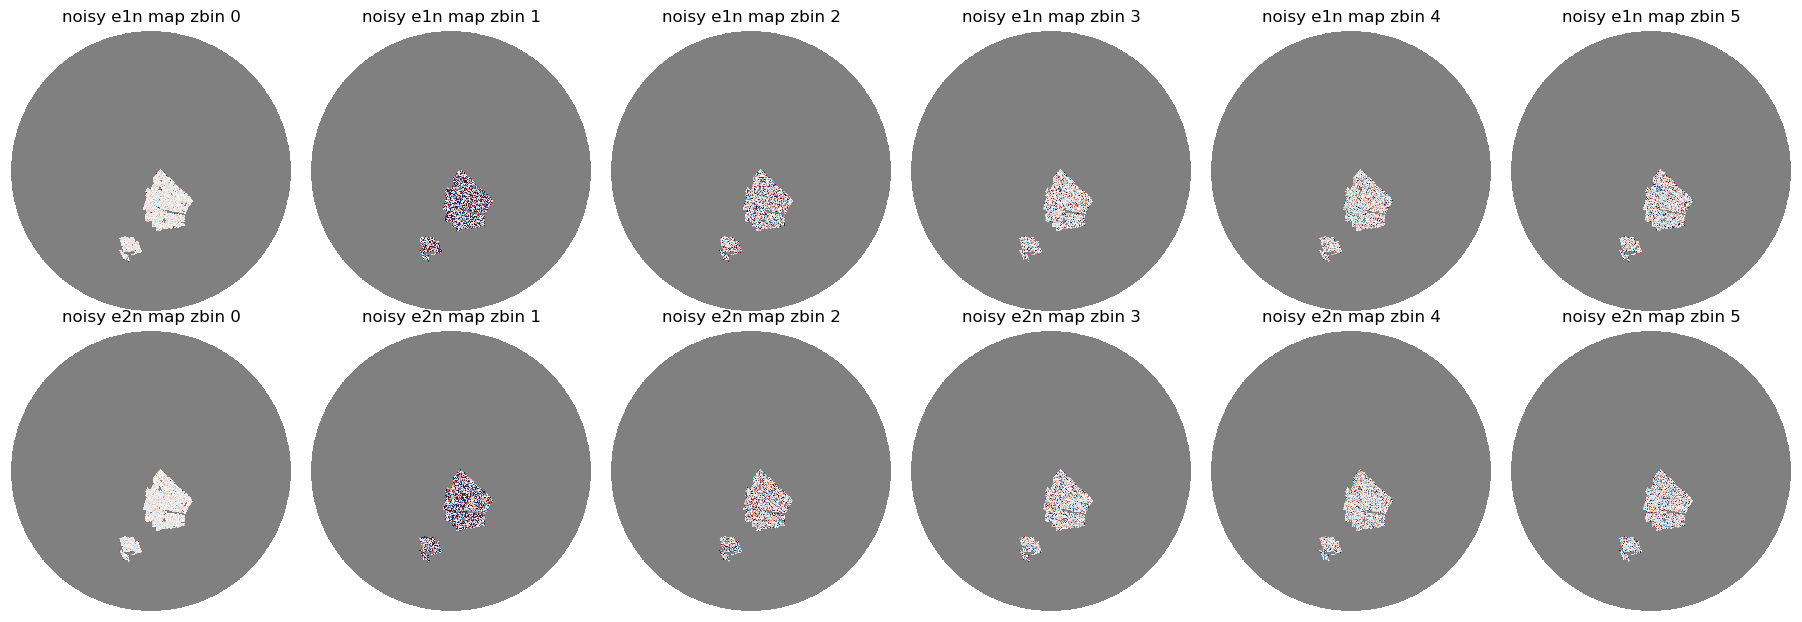

In [101]:
list_maps_noisy = load_maps('e1n', 'e2n')
plot_maps(list_maps_noisy, 'noisy', lims=(-0.1, 0.1))

# Get cosmology parameters

In [109]:
print('Cosmology parameters pyccl:')
with h5py.File(fname, 'r') as f:
    for key in f['cosmo_pyccl'].keys():
        print(key, f['cosmo_pyccl'][key][()])

print()
print('Cosmology parameters astropy:')
with h5py.File(fname, 'r') as f:
    for key in f['cosmo_astropy'].keys():
        print(key, f['cosmo_astropy'][key][()])


print()
print('Cosmology parameters camb:')
with h5py.File(fname, 'r') as f:
    for key in f['cosmo_camb'].keys():
        print(key, f['cosmo_camb'][key][()])


Cosmology parameters pyccl:
Neff 3.044
Omega_b 0.045
Omega_c 0.253788765179
h 0.73
m_nu [0.00666667 0.00666667 0.00666667]
n_s 0.97
sigma8 0.9

Cosmology parameters astropy:
H0 73.0
M_nu nan
Neff 3.04
Ob0 0.0
Ode0 0.7
Om0 0.3
Tcmb0 0.0
w0 -1.1665

Cosmology parameters camb:
Alens 1.0
h 0.73
ombh2 0.023980499999999995
omch2 0.1352440329638891
omegab 0.045
omegac 0.253788765179
omegam 0.2991921345232329
omeganu 0.00040336934423288557
omk 0.0
omnuh2 0.0002149555235417047
